불리언 인덱싱
통계량 계산
다중 불리언 조건 구성
불리언 인덱싱을 사용한 필터링
인덱스 선택을 통한 불리언 인덱싱 복제 
정렬된 고유 인덱스를 사용한 선택
주가 전망
SQL WHERE절 해석
주식 시장 수익률의 정규성 검정
querty 메서드를 사용한 불리언 인덱싱 가독성 개선
where 메서드를 사용한 보존
DataFrame 행 마스크
불리언, 정수 위치, 레이블을 사용한 선택

불리언 값은 대개 Series나 Numpy ndarray에 저장돼 있고 DataFrame의 하나 이상의 열에 불리언 조건을 적용해 생서안다. 여기서는 먼저 불리언 Series를 생성하고 통계량을 계산한 후 데이터를 필터링하기 위한 다양항 불리언 인덱싱을 사용하기 전에 보다 복잡한 조건을 생성해본다.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
movie = pd.read_csv('D:\Work2\movie.csv', index_col = 'movie_title')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
movie_2_hours = movie['duration'] > 120
movie_2_hours.head(10)

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool

In [4]:
#영화 상영시간이 두시간을 넘는지 duration series와 비교해본다.
movie_2_hours = movie['duration'] > 120
movie_2_hours.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: duration, dtype: bool

In [5]:
#Series를 사용해 두 시간 이상인 영화 개수를 알아본다.
movie_2_hours.sum()

1039

In [6]:
#두시간 이상인 비율 mean
movie_2_hours.mean()

0.2113506916192026

In [7]:
#평균을 구하기 위해서는 누락된 값 삭제
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

In [8]:
#describe 메서드
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

대부분의 DataFrame에는 영화 데이터셋에서와 같이 불리언 열이 없다. 불리언 Series를 생성하는 가장 직접적인 방법은 열 중 하나에 비교 연산자를 사용해 조건을 적용하는 것이다. 단계 2에서는 '크거나 같다'는 연산자를 사용해 각 영화 상영 시간이 두 시간보다 더 긴지 테스트한다. 단계 3과 4는 불리언 Series로부터 중요한 두 가지 통계량인 합산과 평균을 계싼한다. 이 기법은 파이썬이 False / True 를 0 / 1로 계산하므로 가능하다. 불리언 Series의 평균값이 True 값의 %라는 것을 증멸할 수 있따. 이를 위해 value_counts 메서드를 사용하고 normalize 매개변수를 Ture로 설정해 분포를 얻을 수 있다.

In [9]:
movie_2_hours.value_counts(normalize = True)

False    0.788649
True     0.211351
Name: duration, dtype: float64

추가사항
동일한 DAtaFrame 내의 두 열을 비교해 불리언 Series를 생성하는 것도 가능하다. 예를 들어 배우 1이 배우 2보다 더 많은 페이스북 좋아요를 가진 비율을 알아낼 수 있다. 이를 위해 이 열 2개를 모두 선택한 후 각 영화에 대해 누락값이 있는 행을 삭제한다. 그런 다음 비교를 통해 평균을 계산한다.

In [10]:
actors = movie[['actor_1_facebook_likes', 'actor_2_facebook_likes']].dropna()
(actors['actor_1_facebook_likes'] > actors['actor_2_facebook_likes']).mean()

0.9777687130328371

다중 불리언 조건 구축
파이썬에서 불리언 표현은 내장 논리 연산자인 and, or, not를 사용한다. 이 키워드는 pandas의 불리언 인덱싱과는 작동하지 않으며 각각 &, |, ~로 대체된다. 또한 각 표현은 괄호로 묵어야 하고 그렇지 않으면 오류 생김

준비 단계 
데이터셋을 위한 정교한 필터를 구축하기 위해서는 복수 개의 불리언 표현을 한꺼번에 통합해 정확한 부분 집합을 추출해야 할 수도 있다. 이 레시피에서는 =imdb_score가 8보다 크고 content_rating이 PG_13이면서 title_year이 2000년 이전이거나 2009년 이후인 것을 선택하는 영화를 찾기 위해 먼저 복수 불리언 표현식을 구축해본다.

In [11]:
#영화 데이터셋을 읽어 들이고 영화 제목을 인덱스로 설정한다.
movie = pd.read_csv('D:\Work2\movie.csv', index_col = 'movie_title')

In [12]:
#각 조건을 각각의 불리언 Series로 저장할 변수를 생성한다.
criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == 'PG-13'
criteria3 = ((movie.title_year < 2000) | (movie.title_year > 2009))

criteria2.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: content_rating, dtype: bool

In [13]:
#모든 기준을 통합해 ㅏㄴ일 불리언 Series에 저장한다.
criteria_final = criteria1 & criteria2 & criteria3
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

작동원리 
Series의 모든 값은 표준 비교 연산자(<, >, ==, !-, <-, >=)를 사용해 스칼라 값과 비교할 수 있다. movie, imdb_score > 8이라는 표현은 imdb_score가 8보다 큰 값일 경우에는 True 값을 갖고 그렇지 않은 경우는 False 값을 갖는 Series를 생성한다. 이 예제의 경우, 불리언 Series의 인덱스는 원래의 것과 동일하게 영화 제목이다.
criteria3 변수는 2개의 독립적인 불리언 식에 의해 생성됐다. 각 식이 정확히 작동하려면 괄호로 묵어야 한다. 

추가사항 
pandas에서는 논리 연산자에 다른 문법을 사용하면 연산자 우선순위가 달라진다. 비교 연산자는 and, or, not보다 우선 순위가 높다. 그러나 pandas의 새 연산자들은 오히려 비교 연산자보다도 더 높은 우선순위를 가지므로 괄호로 묶어야 한다.

In [14]:
5 < 10 and 3 > 4

False

파이썬의 많은 객체가 불리언 표현을 갖고 있다. 0이 아닌 모든 정수는 True. 빈 문자열을 제외한 모든 문자열도 True로 간주된다. 비어 있지 않은 모든 집합, 튜플, 딕셔너리, 리스트는 True다. 빈 DataFrame이나 Series는 참이나 거짓으로 계산되지 않고 바로 오류를 발생한다. 일반적으로 파이썬 객체 자체의 참을 검색하려면 bool함수를 사용해야 한다.

불리언 인덱싱을 사용한 필터링
Seires와 DataFrame 객체에서 불리언 선택을 하는 방법은 동일하다. 둘 다 필텅링하려는 개체와 동일하게 인덱스된 불리언 Series를 인덱스 연산자에 전달하면 된다.
준비 단계
이 레시피는 서로 다른 영화 집단에 2개의 복잡하고 독립적인 불리언 기준을 구축한다. 첫 번째 영화 집합은 이전 레시피에서 정의했던 것으로 imdb_score가 8보다 크고, content_rating이 PG-13이며, title_year가 2000년 이전이거나 2009년 이후인 영화다. 두 번째 영화 집합은 imdb_score가 보 5보다 작고 content_rating이 R이며, title_year가 2000년과 2010년 사이이다.

In [15]:
movie = pd.read_csv('D:\Work2\movie.csv', index_col = 'movie_title')
crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2000)
final_crit_a = crit_a1 & crit_a2 & crit_a3

In [16]:
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = ((movie.title_year >= 2000) & (movie.title_year <= 2010))
final_crit_b = crit_b1 & crit_b2 & crit_b3

In [17]:
#pandas의 or 연산자를 사용해 두 조건 집합을 병합한다. 그 결과, 두 집합 중 하나에 속하는 모든 영화의 불리언 Series가 생성된다.
final_crit_all = final_crit_a | final_crit_b
final_crit_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [18]:
movie[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
The Dark Knight,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,...,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000


In [19]:
cols = ['imdb_score', 'content_rating', 'title_year']
movie_filtered = movie.loc[final_crit_all, cols]
movie_filtered.head(18)

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
The Dark Knight,9.0,PG-13,2008.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
Inception,8.8,PG-13,2010.0
Batman Begins,8.3,PG-13,2005.0
The Bourne Ultimatum,8.1,PG-13,2007.0


작동 원리
단계 1과 단계 2에서 각 기준은 보다 간단한 불리언 식으로부터 구성됐다. 여기처럼 한 것 처럼 반드시 각 불리언 표현식에 변수를 할당할 필요는 없지만, 별도의 변수를 사용하면 가독성이 올라가고 디버그가 편해지는 장점이 있다. 두 집합 모두 필요하므로 단계 3에서는 pandas의 or 논리 연산자를 사용해 이 둘을 병합한다.
단계 4는 불리언 인덱싱의 작동에 대해 정확한 문법을 보여준다. 간단히 단계 3에서 생성된 불리언 Series를 인덱스 연산자에게 전달하면 된다. 이제 final_crit_all에서 참 값을 갖는 영화만 선택된다.
단계 5에서 본 것처럼 .loc인덱서를 사용하면 불리언 인덱싱과 개별 열 선택을 동시에 수행할 수도 있다. 이런 식으로 DataFrame을 간소화하면 논리 연산이 제대로 작동했는지 눈으로 직접 확인하기가 한결 수월하다.
불리언 인덱싱은 .loc 인덱스 연산자와는 잘 작동하지 않는다. 불리언 Series를 전달하게 되면 오류가 발생한다. 그러나 불리언 ndarray를 전달하면 이 레시피에서 다른 인덱서와 같이 동일하게 작동한다.

In [21]:
final_crit_a2 = (movie.imdb_score > 8) & (movie.content_rating == 'PG-13') & ((movie.title_year < 2000)) | (movie.title_year > 2009))
fianl_crit_a2.equals(final_crit_a)

SyntaxError: invalid syntax (<ipython-input-21-68443b339e2c>, line 1)

인덱스를 사용한 불리언 인덱싱의 복제
인덱스의 장점을 활용해 특정 불리언 선택을 복제할 수 있다. 인덱스를 통한 선택은 보다 직관적이며 가독성이 뛰어나다.
준비 단계
이 레시피에서는 대학 데이터셋을 사용해 특정 주에 있는 모든 대학을 선택하는 데 불리언 인덱싱을 텍사스 주에 있는 모든 대학을 선택한다.

In [22]:
college = pd.read_csv('D:\Work2\college.csv')
college[college['STABBR'] == 'TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [23]:
#인덱스 선택을 사용해 복제하기 위해 STABBR열의 정보를 인덱스로 이동한다. 그런 다음 레이블에 기초한 선택을 위해  .loc 인덱서를 사용한다.
college2 = college.set_index('STABBR')
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [24]:
%timeit college[college['STABBR'] == 'TX']

3.17 ms ± 408 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%timeit college2.loc['TX']

1.51 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%timeit college2 = college.set_index('STABBR')

3.72 ms ± 142 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


작동 원리
단계 1은 STABBR이 TX인 열을 검색해 불리언 Series를 생성한다. 이 Series는 인덱스 연산자에 전달되고 데이터를 부분 집합으로 만든다. 이 과정은 동일한 열을 인덱스로 옮긴 후 레이블 기반의 인덱스 선택을 .loc를 사용해 수행하면 복제할 수 있다. 인덱스를 통한 선택은 불리언 선택에 비해 훨씬 더 빠르다.

추가 사항
이 레시피는 단지 단일 주를 선택한다. 불리언이나 인덱스 선택 방법 모두 복수 개의 열을 사용한 선택도 가능하다. 텍사스 , 캘리포니아, 뉴욕을 사용해 선택해보자. 불리언 선택으로는 isin 메서드를 사용하면 되고 인덱스로는 .loc에 리스트를 전달만 하면 된다.

In [27]:
states = ['TX', 'CA', 'NY']
college[college['STABBR'].isin(states)]
college2.loc[states]

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NY,Briarcliffe College–Patchogue,Patchogue,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,38200,28720.5
NY,Jamestown Business College -,Salamanca,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,12050
NY,Pratt Manhattan-A Division of Pratt Institute,New York,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,40900,26691


정렬된 고유 인덱스를 사용한 선택
인덱스 선택의 성능은 인덱스가 고유하거나 정렬돼 있을 때 아주 빨라진다. 앞의 레시피에서는 중복이 포함돼 있는 정렬되지 않은 인덱스를 사용해 상대적으로 느리게 작동했다.

준비 단계
이 레시피에서는 대학 데이터셋을 고유하고 정렬된 인덱스로 만들어 인덱스 선택의 성능을 향상시켜본다. 불리언 인덱싱도 계속 같이 비교해본다.

In [28]:
#대학 데이터을 읽어 들인 후 , STABBR을 인덱스로 하는 별도의 DataFrame을 생성한 후 인덱스가 정렬돼 있는지 검사한다.
college = pd.read_csv('D:\Work2\college.csv')
college2 = college.set_index('STABBR')
college2.index.is_monotonic

False

In [29]:
college3 = college2.sort_index()
college3.index.is_monotonic

True

In [30]:
%timeit college[college['STABBR'] == 'TX']

2.06 ms ± 72.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
%timeit college2.loc['TX']

1.08 ms ± 37.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [32]:
%timeit college3.loc['TX']

329 µs ± 22.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [33]:
#고유한 인덱스
college_unique = college.set_index('INSTNM')
college_unique.index.is_unique

True

In [34]:
college[college['INSTNM'] == 'Stanford University']

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


In [35]:
college_unique.loc['Stanford University']

CITY                  Stanford
STABBR                      CA
HBCU                         0
MENONLY                      0
WOMENONLY                    0
RELAFFIL                     0
SATVRMID                   730
SATMTMID                   745
DISTANCEONLY                 0
UGDS                      7018
UGDS_WHITE              0.3752
UGDS_BLACK              0.0591
UGDS_HISP               0.1607
UGDS_ASIAN              0.1979
UGDS_AIAN               0.0114
UGDS_NHPI               0.0038
UGDS_2MOR               0.1067
UGDS_NRA                0.0819
UGDS_UNKN               0.0031
PPTUG_EF                     0
CURROPER                     1
PCTPELL                 0.1556
PCTFLOAN                0.1256
UG25ABV                 0.0401
MD_EARN_WNE_P10          86000
GRAD_DEBT_MDN_SUPP       12782
Name: Stanford University, dtype: object

In [36]:
%timeit college[college['INSTNM'] == 'Standford University']

1.86 ms ± 208 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [37]:
%timeit college_unique.loc['Stanford University']

280 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


college2처럼 인덱스가 정렬돼 있지 않고 중복이 있는 경우 pandas는 정확한 선택을 위해 인덱스의 모든 값을 검사해야 한다. 인덱스가 college3의 경우처럼 정렬돼 있다면 pandas는 이진 탐색 알고리즘이라 불리는 알고리즘 활용
후반은 인덱스로 고유한 열을 사용.pandas는 고유한 인덱스를 해시 테이블로 구현해둬서 빠른 선택 가능

추가 사항
불리언 선택은 인덱스 선택에 비해 훨씬 유연하다. 숫자로 된 임의의 개수의 열에 대해 조건을 줄 수 있기 때문이다. 이 레시피에서는 인덱스로 단일 열을 사용했다. 다수의 열을 이어붙여 하나의 인덱스로 사용할 수ㄷ 있다. 

In [38]:
college.index = college['CITY'] + ', ' + college['STABBR']
college = college.sort_index()
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA, CA",Angeles Institute,ARTESIA,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0175,0.0088,0.0088,0.0000,1,0.6275,0.8138,0.5429,NaN,16850
"Aberdeen, SD",Presentation College,Aberdeen,SD,0.0,0.0,0.0,1,440.0,480.0,0.0,...,0.0284,0.0142,0.0823,0.2865,1,0.4829,0.7560,0.3097,35900,25000
"Aberdeen, SD",Northern State University,Aberdeen,SD,0.0,0.0,0.0,0,480.0,475.0,0.0,...,0.0219,0.0425,0.0024,0.1872,1,0.2272,0.4303,0.1766,33600,24847
"Aberdeen, WA",Grays Harbor College,Aberdeen,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0937,0.0009,0.0250,0.1820,1,0.4530,0.1502,0.5087,27000,11490
"Abilene, TX",Hardin-Simmons University,Abilene,TX,0.0,0.0,0.0,1,508.0,515.0,0.0,...,0.0298,0.0159,0.0102,0.0685,1,0.3256,0.5547,0.0982,38700,25864


In [39]:
college.loc['Miami, FL'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami, FL",New Professions Technical Institute,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.4464,1,0.8701,0.6780,0.8358,18700,8682
"Miami, FL",Management Resources College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.0000,1,0.4239,0.5458,0.8698,PrivacySuppressed,12182
"Miami, FL",Strayer University-Doral,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,49200,36173.5
"Miami, FL",Keiser University- Miami,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,29700,26063
"Miami, FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0046,0.0,0.0,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


In [40]:
%%timeit
crit1 = college['CITY'] == 'Miami'
crit2 = college['STABBR'] == 'FL'
college[crit1 & crit2]

2.99 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
%timeit college.loc['Miami, FL']

342 µs ± 21.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


주가 전망 
주식을 매입한 투자가들은 분명히 최고가나 그 근처에서 주식을 되팔고 싶어할 것이다. 물론 현실에 있어서는 이렇게 하는 것이 쉽지 않고, 특히 주가가 어떤 특정 지점에 형성된지 얼마 되지 않은 경우에는 특히 더 그렇다. 불리언 인덱싱을 사용하면 특정 주식이 어떤 특정값을 상향하거나 하향한 기간을 모두 찾을 수 있다. 이 연습을 통해 특정 주식을 거래해야 하는 일반적인 범위에 대한 시각 얻음

준비 단계
이 레시피에서는 슐륨베르거 주식을 2010 ~ 2017년 불리언 인덱싱을 사용해 종가 하위 10% 상위 10% 추출
모든 지점 그래프 , 하위 10% 상위 10% 부각

In [42]:
slb = pd.read_csv('D:\Work2\slb_stock.csv', index_col = 'Date', parse_dates=['Date'])
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [43]:
#종가를 Series로 선택한 후, describe 메서드를 사용해 Sereis 요악 통계량을 살펴본다.
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles = [.1, .9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [44]:
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
criteria = (slb_close < lower_10) | (slb_close > upper_10)
slb_top_bottom_10 = slb_close[criteria]

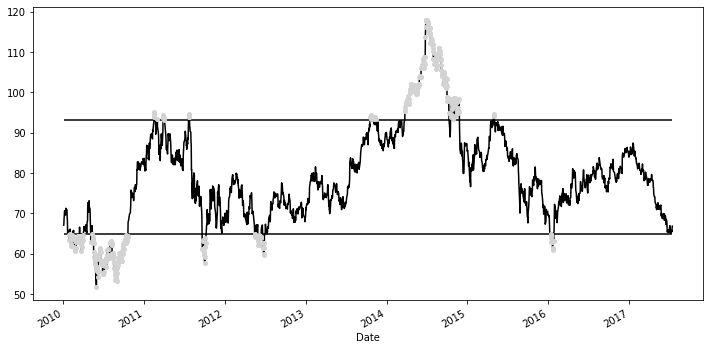

In [45]:
slb_close.plot(color='black', figsize = (12, 6))
slb_top_bottom_10.plot(marker = 'o', style = ' ', ms = 4, color = 'lightgray')
xmin = criteria.index[0]
xmax = criteria.index[-1]
import matplotlib.pyplot as plt
plt.hlines(y=[lower_10, upper_10], xmin = xmin, xmax=xmax, color = 'black')

작동 원리
단계 2에서의 describe 메서드 겨로가는 그 자체로 요약 통계량을 인덱스 레이블로 갖는 Series다. 이 요약 Series는 그 자체 변수에 10%와 90% 분위수에 해당하는 값을 저장한다. 단계 3은 불리언 인덱싱을 사용해 분포 중 상위와 하위 10%에 속한 것만 선택한다.
Series와 DataFrame 모두 직접 그래프를 그릴 수 있는 plot 메서드를 갖고 있다. 첫 번째 plot 메서드 호출은 slb_close Series로부터며, 여기에는 모든 SLB 종가가 들어 있고, 그래프상의 검은색 선이 이에 해당한다. slb_filtered의 점들은 회색으로 모든 종가 바로 위에 덮어 그린다. style 매개변수에는 공백을 설정해 라인이 그려지지 않도록 한다. ms 매개변수는 표식의 크기를 설정한다.
matplotlib에는 hlines이라는 편의 함수가 제공되는데, 수평선을 그리는 기능을 갖고 있다. 이 함수는 y 값의 리스트를 입력으로 받아 xmin부터 xmax까지 그린다. 
작성된 그래프로 판단해보면 비록 SLB의 기간 내 최고가는 주당 120달러였지만, 최근 7년간은 오직 10%의 거래일 동안만 83달러를 상회했다.ㅠ

추가예제 
상위 10%와 하위 10% 표시를 위해 종가 위에 붉은색 점을 그리는 대신 matplotlib의 fill_between 함수를 사용핻도 된다. 이 함수는 두 선 사이의 모든 영역을 칠한다. 이 함수의 where라는 매개변수에 불리언 Series를 지정하면 어느 영역을 칠할 것인지 정확히 설정해줄 수 있다.

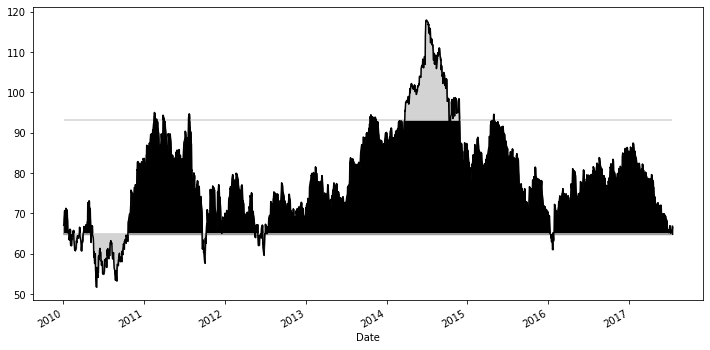

In [46]:
slb_close.plot(color = 'black', figsize = (12, 6))
plt.hlines(y=[lower_10, upper_10], xmin = xmin, xmax = xmax, color = 'lightgray')
plt.fill_between(x = criteria.index, y1=lower_10, y2 = slb_close.values, color = 'black')
plt.fill_between(x = criteria.index, y1=lower_10, y2 = slb_close.values, where=slb_close < lower_10, color = 'lightgray')
plt.fill_between(x = criteria.index, y1=upper_10, y2 = slb_close.values, where=slb_close > upper_10, color = 'lightgray')

많은 pandas 사용자들은 데이터 처리에 관한 배경 지식을 어디에서나 볼 수 있는 SQL을 통해 습득했을 것이다. SQL은 데이터베이스에 저장된 데이터를 정의, 조작 및 통제하는 표준 언어다. SELECT 문장은 SQL을 사용해 데이터를 선택, 필터링, 종합, 정렬을 할 때 사용하는 가장 흔한 방법. pandas는 데이터베이스에 연결해 SQL 명령문을 전송하는 기능이 있다.

In [47]:
employee = pd.read_csv('D:\Work2\employee.csv')

In [48]:
employee.DEPARTMENT.value_counts().head()


Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [49]:
employee.BASE_SALARY.describe().astype(int)

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int32

In [50]:
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
criteria_dept = employee.DEPARTMENT.isin(depts)
criteria_gender = employee.GENDER == 'Female'
criteria_sal = (employee.BASE_SALARY >= 80000) & (employee.BASE_SALARY <= 120000)

In [51]:
criteria_final = (criteria_dept & criteria_gender & criteria_sal)

In [52]:
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']
employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


필터링하기 전에 분명 사용해야 할 정확한 문자열을 알고 있어야 한다. Series의 value_counts 메서드는 정확한 문자열 이름과 그 값의 빈도수를 동시에 알아낼 수 있는 훌륭한 도구다.
Series의 isin메서드는 SQL IN 연산자와 동일하고 유지하고자 하는 모든 값을 리스트로 입력받는다. 이 표현식을 복제하려면 OR 조건을 연속적으로 사용할 수도 있지만, 효율적이지도 않고 좋은 표현법도 못된다.
급여 조건에 관한 불리언 Series인 criteria_sal는 간단한 2개의 부등식을 병합해 생성한다. 모든 조건은 마지막으로 pandas의 and 연산자인 &를 사용해 병합돼 단일 불리언 Series를 필터로 생성한다.

추가 사항
pandas에는 많은 연산에서 동일한 결과를 얻을 수 있는 여러 가지 다른 방법이 존재한다. 앞의 레시피의 경우, 급여 조건은 2개의 별도의 불리언 식을 사용해 만들었다. SQL과 비슷하게 Series에느 between 메서드가 존재해 다음과 가티 하면 동일한 급여 조건을 선택할 수 있다.

In [53]:
criteria_sal = employee.BASE_SALARY.between(80000, 120000)

In [54]:
top_5_depts = employee.DEPARTMENT.value_counts().index[:5]
criteria = ~employee.DEPARTMENT.isin(top_5_depts)
employee[criteria]

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
18,18,MAINTENANCE MECHANIC III,General Services Department,40581.0,Hispanic/Latino,Full Time,Male,Active,2008-12-29,2008-12-29
32,32,SENIOR ACCOUNTANT,Finance,46963.0,Black or African American,Full Time,Male,Active,1991-02-11,2016-02-13
...,...,...,...,...,...,...,...,...,...,...
1976,1976,SENIOR SIDELOADER OPERATOR,Solid Waste Management,34466.0,Hispanic/Latino,Full Time,Female,Active,2015-07-20,2016-01-30
1983,1983,ADMINISTRATIVE SPECIALIST,Admn. & Regulatory Affairs,55172.0,Black or African American,Full Time,Female,Active,2006-10-16,2006-10-16
1985,1985,TRUCK DRIVER,Fleet Management Department,30222.0,Black or African American,Full Time,Male,Active,2013-06-10,2015-08-01
1988,1988,SENIOR ASSISTANT CITY ATTORNEY II,Legal Department,124115.0,White,Full Time,Male,Active,2013-01-23,2013-03-02


주식 시장 수익률의 정규성 검정
통계 기초 책을 보면 데이터의 모집단을 설명하기 위해 정규 분포가 상당히 많이 사용된다. 랜덤 프로세스는 대부분의 경우 정규 분포처럼 보이지만 실생활은 보다 복잡하기 마련이다. 주식 시장의 수익률은 정규 분포처럼 봉지만 사실은 그렇지 않은 것이 대표적인 예다.

준비 단계
아마존의 일별 주식 시장 수익률을 알아보고, 그것이 정규 분포를 따르는지 검정해본다.

In [55]:
amzn = pd.read_csv('C:/Users/amzn_stock.csv', index_col = 'Date', parse_dates = ['Date'])
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [56]:
#종가만 선택한 Series를 생성한 후 pct_change 메서드를 사용해 일별 수익률을 계산한다.
amzn_daily_return = amzn.Close.pct_change()
amzn_daily_return.head()

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

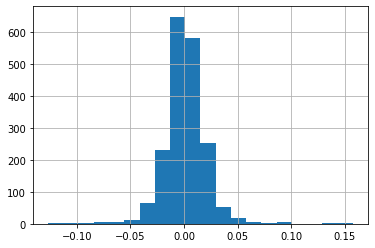

In [57]:
#누락값을 삭제하고 수익률의 히스토그램을 그린 후, 분포를 시각적으로 살펴본다.
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.hist(bins = 20)

In [58]:
mean = amzn_daily_return.mean()
std = amzn_daily_return.std()

In [59]:
abs_z_score = amzn_daily_return.sub(mean).abs().div(std)

In [60]:
pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
print('{:.3f} fall within 1 standard deviation. ' '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

0.787 fall within 1 standard deviation. 0.956 within 2 and 0.985 within 3


작동 원리
Sereis의 pct_change 메서드는 디폴트로 현재 원소와 직전 원소 간의 % 변화를 계산한다. 이는 주식 종가 데이터로부터 일별 % 수익률을 계산해준다. 반환된 Series의 최초 원소는 그 이전 값이 존재하지 않으므로 빈 갑시앋. 
히스토그램은 1차원 수치 데이터를 요약해 시각적으로 살펴볼 수 있는 환상적인 도구다. 분포 그림으로부터 대칭인 것은 확실한데 정규 분포인지, 아닌지 판단하기에는 명확하지 않다. 분포의 정규성을 확인하는 형식적인 방법이 존재하지만, 여기서는 간단히 68 - 95 - 99.7만 검사

추가 사항
이 프로세스를 자동화하려면 주가 데이터를 읽어 들이고 일별 데이터를 평균으로부터 1, 2, 3 표준편차 범위에 대해 비율에 따라 일별 수익률 히스토그램을 그리도록 할 수 있다.

0.742 fall within 1 standard deviation. 0.946 within 2 and 0.986 within 3


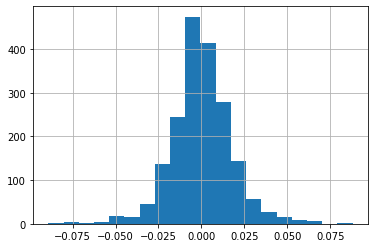

In [61]:
def test_return_normality(stock_data):
    close = stock_data['Close']
    daily_return = close.pct_change().dropna()
    daily_return.hist(bins=20)
    mean = daily_return.mean()
    std = daily_return.std()
    
    abs_z_score = abs(daily_return - mean) /std
    pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
    
    print('{:.3f} fall within 1 standard deviation. ' '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))


slb = pd.read_csv('D:\Work2\slb_stock.csv', index_col = 'Date', parse_dates = ['Date'])
test_return_normality(slb)

query 메서드를 사용한 불리언 인덱싱의 가독성 개선
불리언 인덱싱이 데이터를 읽고 쓰는 데 있어 최선의 선택인 것은 아니다. 특히 복잡한 필터를 한 줄로 사용할 때는 더욱 그렇다. pandas에는 DataFrame의 query 메서드를 사용해 문자열 기반의 문법을 제공하고 있는데 이를 사용하면 명확한 표현이 가능하다.

준비 단계
이 레시피는 이 장의 이전 레시피 SQL WHERE절 해석을 복제한다. 그러나 여기서는 DataFrame의 query 메서드의 장점을 활용한다. 과제의 목표는 데이터를 필터링해 연봉이 8만에서 12만 사이에 있는 여성 경찰 혹은 여성 소방 공무원을 찾아내는 것이다.

In [62]:
employee = pd.read_csv('D:\Work2\employee.csv')
depts = ['Houston Police Department-HBD', 'Houston Fire Department (HFD)']
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']

In [63]:
qs = "DEPARTMENT in @depts " "and GENDER == 'Female' " "and 80000 <= BASE_SALARY <= 120000"
emp_filtered = employee.query(qs)
emp_filtered[select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0


작동 원리
query 메서드에 사용되는 문자열은 일반적인 pandas의 코드에 비해 훨씬 더 일상 영어에 가깝다. depts에 사용한 것처러 파이썬 변수는 @ 심볼을 사용해 참고할 수 있다. 모든 DataFrame의 열 이름은 query의 이름 공간내에서 작은 따옴표 없이 간단히 참고 할 수 있다. Female처럼 문자열을 사용하려면 작은 따옴표로 감싸야 한다.
query 구문이 가진 또 다른 멋진 기능은 이중 부등식을 하나의 식으로 표현할 수 있다는 것과 불리언 인덱싱에서 사용한 비트 연산자와 달리 and, or , not과 같은 논리 연산자를 사용할 수 있다는 것이다.

추가 사항
부서 이름을 수작업으로 일일일 입력하는 대신 프로그램으로 생성할 수 있따. 빈도수 10위에 드는 부서에 속하지 않는 모든 여직원을 찾기

In [64]:
top10_depts = employee.DEPARTMENT.value_counts().index[:10].tolist()
qs = "DEPARTMENT not in @top10_depts and GENDER == 'Female'"
employee_filtered2 = employee.query(qs)
employee_filtered2.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
73,73,ADMINISTRATIVE SPECIALIST,Human Resources Dept.,55939.0,Black or African American,Full Time,Female,Active,2011-12-19,2013-11-23
96,96,ASSISTANT CITY CONTROLLER III,City Controller's Office,59077.0,Asian/Pacific Islander,Full Time,Female,Active,2013-06-10,2013-06-10
117,117,SENIOR ASSISTANT CITY ATTORNEY I,Legal Department,90957.0,Black or African American,Full Time,Female,Active,1998-03-20,2012-07-21
146,146,SENIOR STAFF ANALYST,Houston Information Tech Svcs,74951.0,White,Full Time,Female,Active,2014-03-17,2014-03-17


Where 메서드를 사용한 Series 보존
불리언 인덱싱은 조건에 맞지 않은 모든 열을 데이터셋에서 반드시 제거함으로써 필터링한다. 반면, where 메서드를 사용하면 모든 값을 제거하지 않고 그대로 유지할 수 있다. where메서드는 series나 DataFrame을 원래 크기대로 유지하며 조건에 맞지 않은 값은 누락값으로 설정하거나 다른 것으로 대체한다.

준비 단계
이 레시피에서는 where 메서드를 불리언 조건에 전달해 영화 데이터셋에 있는 배우 1에 대해 페이스북 좋아요 개수의 최솟값과 최댓값에 대한 상하한을 설정한다.

In [65]:
#actor_1_facebook_lies 열에 누락되지 않은 모든 값을 선택한다.
movie = pd.read_csv('D:\Work2\movie.csv', index_col='movie_title')
fb_likes = movie['actor_1_facebook_likes'].dropna()
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [66]:
#describe 메서드를 사용해 분포를 추정해보자.
fb_likes.describe(percentiles = [.1, .25, .4, .75, .9]).astype(int)

count      4909
mean       6494
std       15106
min           0
10%         240
25%         607
40%         854
50%         982
75%       11000
90%       18000
max      640000
Name: actor_1_facebook_likes, dtype: int32

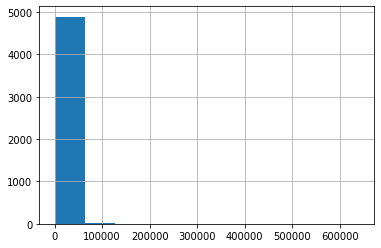

In [67]:
#히스토그램 사용
fb_likes.hist()

In [68]:
#중간값에 비해 오른쪽으로 편향돼 있는 것 좋아요 수가 2만개 이하인지 테스트하는 조건을 만들자.
criteria_high = fb_likes < 20000
criteria_high.mean().round(2)

0.91

In [69]:
fb_likes.where(criteria_high).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [70]:
#where 메서드의 두 번째 매개변수는 other로서 어떤 값으로 대체할지를 선택할 수 있다. 누락값을 모두 20000으로 대체해보자.
criteria_low = fb_likes > 300
fb_likes_cap = fb_likes.where(criteria_high, other = 20000).where(criteria_low, 300)
fb_likes_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

In [71]:
#처음 Series와 수정된 SEries의 크기는 동일하다
len(fb_likes), len(fb_likes_cap)

(4909, 4909)

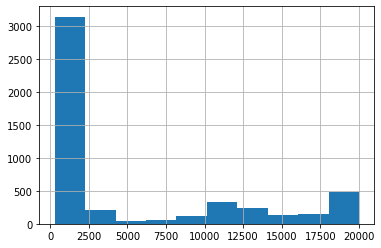

In [72]:
fb_likes_cap.hist()

작동 원리 
Where 메서드는 호출된 객체의 크기와 모양을 그대로 유지하고 그 값이 True인 곳은 값을 변경하지 않는다. 단계 1에서 누락된 값을 삭제하는 것은 중요하다. where 메서드가 그다음 단계에서 그 부분을 다른 유효한 값으로 대체했을 것이기 때문이다. 
단계 2에서의 요약 통계량은 데이터의 상한을 만드는 것이 좋겠다는 직관을 준다. 
반면 3단계의 히스토그램은 모든 데이터를 하나의 칸에 모두 몰아넣은 것처럼 보인다. 데이터에 너무 많은 이상값이 있어서 히스토그램이 이상하게 보인다. where 메서드는 테이터의 상한 하한을 만들어 히스토그램에 더 많은 막대가 나타나도록 해준다.

추가 사항
pandas에는 사실 이 연산을 복제할 수 있는 내장된 메서드인 clip, clip_lower, clip_upper가 있다. 

In [73]:
fb_likes_cap2 = fb_likes.clip(lower= 300, upper = 20000)
fb_likes_cap2.equals(fb_likes_cap)

True

DataFrame 행 마스크
mask 메서드는 where 메서드와 정확히 반대되는 기능을 수행
디폴트는 불리언 조건이 참인 곳을 누락값으로 만든다. 기본적으로 문자 그대로 데이터셋의 모든 행을 마스크한 후, 누락값이 있는 모든 행을 제거

In [74]:
movie = pd.read_csv('D:\Work2\movie.csv', index_col = 'movie_title')
c1 = movie['title_year'] >= 2010
c2 = movie['title_year'].isnull()
criteria = c1 | c2

In [75]:
movie.mask(criteria).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spectre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Dark Knight Rises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
movie_mask = movie.mask(criteria).dropna(how = 'all')
movie_mask.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0.0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000.0
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0.0


In [79]:
movie_boolean = movie[movie['title_year'] < 2010]
movie_mask.equals(movie_boolean)

False

In [80]:
movie_mask.shape == movie_boolean.shape

True

In [82]:
movie_mask.dtypes == movie_boolean.dtypes

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                        True
actor_1_name                  True
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link               True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                    True
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [84]:
from pandas.testing import assert_frame_equal
assert_frame_equal(movie_boolean, movie_mask, check_dtype = False)

In [85]:
#마스크 후 누락값을 삭제하는 것과 불리언 인덱싱 하는 것
%timeit movie.mask(criteria).dropna(how = 'all')

72.5 ms ± 6.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [86]:
%timeit movie[movie['title_year'] < 2010]

4.85 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


불리언, 정수 위치, 레이블을 이용한 선택

In [87]:
movie = pd.read_csv('D:\Work2\movie.csv', index_col = 'movie_title')
c1 = movie['content_rating'] == 'G'
c2 = movie['imdb_score'] < 4
criteria = c1 & c2

In [88]:
movie_loc = movie.loc[criteria]
movie_loc.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000


In [89]:
movie_loc.equals(movie[criteria])

True

In [90]:
movie_iloc = movie.iloc[criteria]

ValueError: iLocation based boolean indexing cannot use an indexable as a mask

In [91]:
movie_iloc = movie.iloc[criteria.values]
movie_iloc.equals(movie_loc)

True

In [92]:
criteria_col = movie.dtypes == np.int64
criteria_col.head()

color                      False
director_name              False
num_critic_for_reviews     False
duration                   False
director_facebook_likes    False
dtype: bool

In [93]:
movie.loc[:, criteria_col].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [94]:
movie.iloc[:, criteria_col.values].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [96]:
cols = ['content_rating', 'imdb_score', 'title_year', 'gross']
movie.loc[criteria, cols].sort_values('imdb_score')

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


In [97]:
col_index = [movie.columns.get_loc(col) for col in cols]
col_index

[20, 24, 22, 8]

In [98]:
movie.iloc[criteria.values, col_index]

,content_rating,imdb_score,title_year,gross
movie_title,,,,
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN


In [99]:
movie.iloc[:, criteria_col.values].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [100]:
cols = ['content_rating', 'imdb_score', 'title_year', 'gross']
movie.loc[criteria, cols].sort_values('imdb_score')

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


In [101]:
col_index = [movie.columns.get_loc(col) for col in cols]
col_index

[20, 24, 22, 8]

In [102]:
movie.iloc[criteria.values, col_index]

,content_rating,imdb_score,title_year,gross
movie_title,,,,
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN


작동 원리 
불리언 인덱싱은 .iloc와 .loc 인덱서에 모두 사용할 수 있다. 다만 .iloc에는 Series를 전달할 수 없고 기저 ndarray만 전달할 수 있다는 것만 기억하면 된다. 이제 조건 Series의 기저 1차원 ndarray를 살펴보자.

In [103]:
a = criteria.values
a[:5]

array([False, False, False, False, False])

In [104]:
len(a), len(criteria)

(4916, 4916)

배열은 Series와 동일한 길이를 갖는데 이는 영화 DataFrame과 같은 길이다. 불리언 배열을 위한 정수 위치는 DataFrame의 정수 위치와 일치하고 필터링은 예상대로 작동한다. 이 배열들은 .loc 연산자와도 작동하지만, .iloc를 위해 필요하다

In [107]:
movie.loc[[True, False, True], [True, False, False, True]]

IndexError: Boolean index has wrong length: 3 instead of 4916